#### The effect of max distance cutoffs

This notebook uses CRPropa to run a few different simulations for the EBL and assess differences in the spectrum produced. First let's set up the modules and functions we need.

In [1]:
from crpropa import *
import pylab as pl
import numpy as np 
from aab_subroutines import * 
import matplotlib.pyplot as plt
%matplotlib inline

def add_composition_run(sim, source, Zs, mass, names, fracs, gamma, rcut, weights):
    composition = SourceComposition(1 * EeV, (rcut/1e18) * EeV, -gamma)
    
    for i in range(len(Zs)):
        composition.add(mass[i], Zs[i],  fracs[i])  # H
    source.add( composition )
    
    # run simulation
    sim.setShowProgress(True)
    sim.run(source, 500000, True)

Now define the injection parameters for the input CR spectrum

In [2]:
mysum = 0.0
Zs = [1,2,7,14,26]
mass = [1,4,14,28,56]
names = ["H", "He", "N", "Si", "Fe"]
fracs = [0.033, 0.036, 0.721, 0.209, 0.0]
rcut = 10.0**19.86
gamma = 2.05

weights = [1.0, 0.328, 0.504, 0.168, 0.0]
weights = np.array([fracs[i]*(Zs[i]**(2.0-gamma)) for i in range(len(fracs))])
weights /= np.sum(weights)
print (weights)

Zs = [1,2,7,14,26]
mass = [1,4,14,28,56]
names = ["H", "He", "N", "Si", "Fe"]
#fracs = [0.125,0.586,0.246,0.042,0.0]
fracs = [0.064, 0.467, 0.375, 0.094, 0.0]
# rcut = 10.0**18.66
# gamma = 0.93

rcut = 10.0**18.72
gamma = 1.22

weights = [1.0, 0.328, 0.504, 0.168, 0.0]
weights = np.array([fracs[i]*(Zs[i]**(2.0-gamma)) for i in range(len(fracs))])
weights /= np.sum(weights)
print (weights)

[0.03646038 0.03842007 0.72274911 0.20237044 0.        ]
[0.01931712 0.24203751 0.51638086 0.22226451 0.        ]


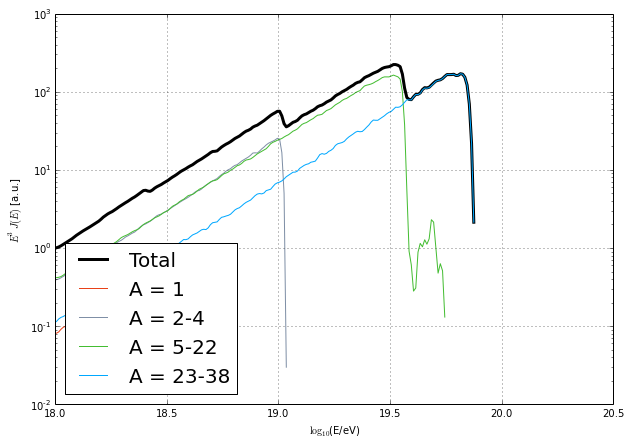

In [3]:
#   CMB, IRB, IRB_Kneiske04, IRB_Stecker05, 
#   IRB_Franceschini08, IRB_Finke10, IRB_Dominguez11, IRB_Gilmore12, 
#   IRB_Stecker16_upper, IRB_Stecker16_lower, URB_Protheroe96 


fname = "model-d30.txt"
sim, source, output = setup_sim(fname, maxdistance=30)
add_composition_run(sim, source, Zs, mass, names, fracs, gamma, rcut, weights)
output.close()

pl.figure(figsize=(10,7))
make_plot_observed(fname, bins=None, norm=None)
pl.xlim(18,20.5)
pl.savefig("model-d30.png")

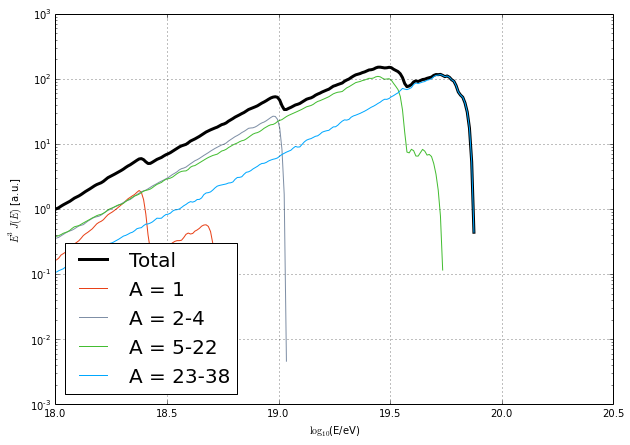

In [4]:
fname = "model-d100.txt"
sim, source, output = setup_sim(fname, maxdistance=100)
add_composition_run(sim, source, Zs, mass, names, fracs, gamma, rcut, weights)
output.close()

pl.figure(figsize=(10,7))
make_plot_observed(fname, bins=None, norm=None)
pl.xlim(18,20.5)
pl.savefig("model-d100.png")

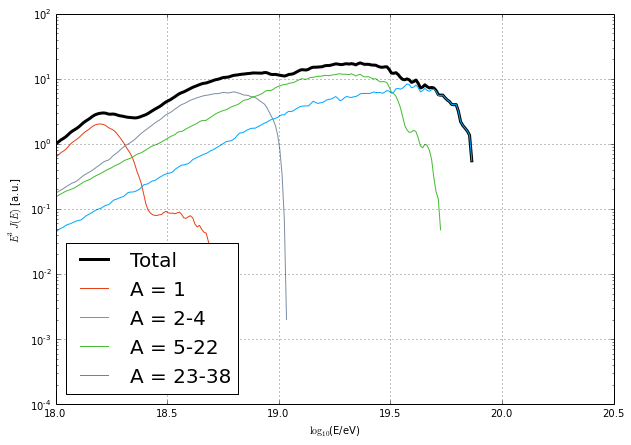

In [5]:
fname = "model-d1000.txt"
sim, source, output = setup_sim(fname, maxdistance=1000)
add_composition_run(sim, source, Zs, mass, names, fracs, gamma, rcut, weights)
output.close()

pl.figure(figsize=(10,7))
make_plot_observed(fname, bins=None, norm=None)
pl.xlim(18,20.5)
pl.savefig("model-d1000.png")

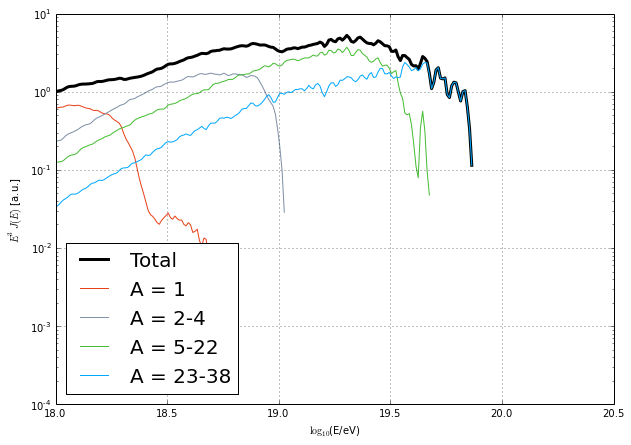

In [6]:
fname = "model-d10000.txt"
sim, source, output = setup_sim(fname, maxdistance=10000)
add_composition_run(sim, source, Zs, mass, names, fracs, gamma, rcut, weights)
output.close()

pl.figure(figsize=(10,7))
make_plot_observed(fname, bins=None, norm=None)
pl.xlim(18,20.5)
pl.savefig("model-d10000.png")